# Resolución del examen 3 del curso de Control Automático
## Alumno: Bregy Malpartida

In [1]:
import control as ct
import control2020 as ct20
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy.io import loadmat

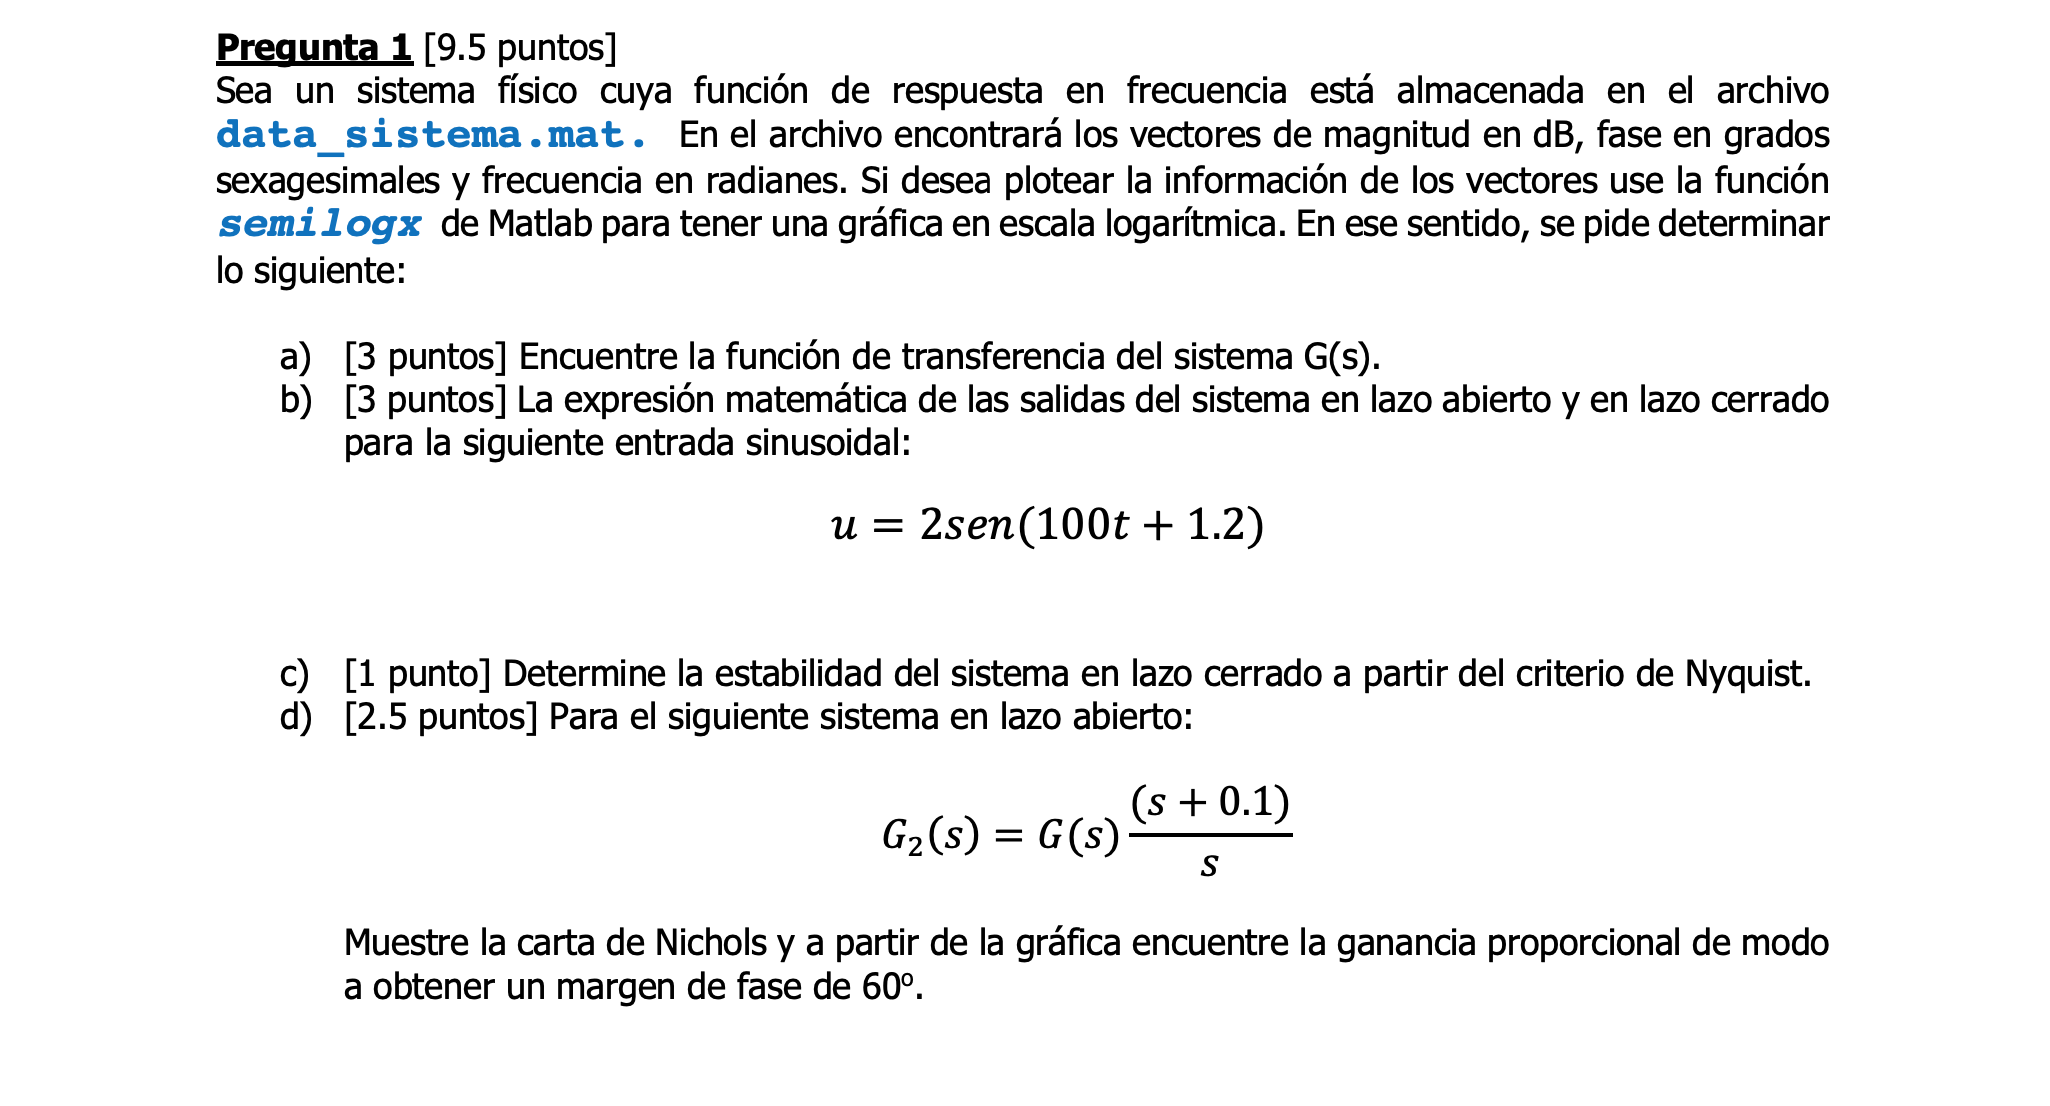

In [2]:
data_filepath = "data_sistema.mat"

---

###  a) Encuentre la función de transferencia del sistema G(s).

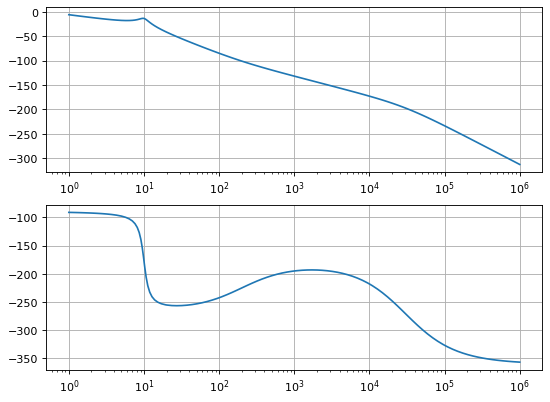

In [141]:
data = loadmat(data_filepath)
mag, phase, w = data["Magn"], data["fase"], data["wout"]

mag = mag.reshape([-1, ])
phase = phase.reshape([-1, ])
w = w.reshape([-1, ])

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(211)
plt.semilogx(w, mag)
plt.grid()

plt.subplot(212)
plt.semilogx(w, phase)
plt.grid()

0 states have been removed from the model



                    8.602e+07 s + 1.29e+10
---------------------------------------------------------------
s^5 + 4.04e+04 s^4 + 4.082e+08 s^3 + 1.452e+09 s^2 + 4.08e+10 s

<Figure size 640x480 with 0 Axes>

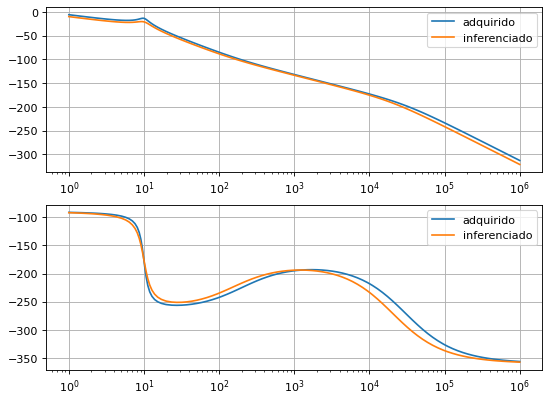

In [142]:
gain = -10 # approx
wn = 1e1 # approx
g_wn = -1 # approx

K = np.power(10, gain/20)

psi = np.power(10, (gain - g_wn)/20)/2

# zeros
a = 1e2 + 50 # approx

# poles
b = 2e4 + 200 # approx

s = ct.TransferFunction([1, 0], [1])
g = K*wn**2/(s**2 + 2*psi*wn*s + wn**2)*(b/(s+b))**2*(s+a)/a/s
g = ct.minreal(g)
display(g)

# Plotting bode plot
plt.figure(num=None, figsize=(8, 6), dpi=80)
mag_i, phase_i, w_i = ct.bode(g, w, Plot=False)

mag_i = 20*np.log10(mag_i)
phase_i = phase_i*180/np.pi

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(211)
plt.semilogx(w, mag)
plt.semilogx(w_i, mag_i)
plt.legend(["adquirido", "inferenciado"])
plt.grid()

plt.subplot(212)
plt.semilogx(w, phase)
plt.semilogx(w_i, phase_i)
plt.legend(["adquirido", "inferenciado"])
plt.grid()

La función de transferencia final es:

In [143]:
g


                    8.602e+07 s + 1.29e+10
---------------------------------------------------------------
s^5 + 4.04e+04 s^4 + 4.082e+08 s^3 + 1.452e+09 s^2 + 4.08e+10 s

---

### b) La expresión matemática de las salidas del sistema en lazo abierto y en lazo cerrado para la siguiente entrada sinusoidal

$$ u = 2sin(100t+1.2) $$

In [200]:
def magphase_at(g, omega):
    val = g.evalfr(omega)
    mag = np.abs(val)
    phase = np.angle(val)
    phase = (phase - 2*np.pi) if phase > 0 else phase

    return mag[0][0], phase[0][0]

def sin_in_out(g, omega, phi, gain=1):
    mag_at_wi, phase_at_wi = magphase_at(g, wi)

    b = mag_at_wi * gain
    ph0 = phase_at_wi + phi
    
    return b, ph0

In [208]:
wi = 100
phi = 1.2


print("Lazo abierto")
b, ph = sin_in_out(g, wi, phi, gain=2)
print (f"B= {b} | Ph0= {ph}")
print("")
print("Lazo cerrado")
b, ph = sin_in_out(g.feedback(1), wi, phi, gain=2)
print (f"B= {b} | Ph0= {ph}")

Lazo abierto
B= 7.672834583042578e-05 | Ph0= -2.898462883174484

Lazo cerrado
B= 7.673004159361719e-05 | Ph0= -2.8984942424575584


$$ Respuesta\ en\ lazo\ abierto$$
$$ u = 7.672\cdot10^{-5}sin(100t - 2.898) $$

$$ Respuesta\ en\ lazo\ cerrado$$
$$ u = 7.673\cdot10^{-5}sin(100t - 2.898) $$

---

### c) Determine la estabilidad del sistema en lazo cerrado a partir del criterio de Nyquist.

In [210]:
g


                    8.602e+07 s + 1.29e+10
---------------------------------------------------------------
s^5 + 4.04e+04 s^4 + 4.082e+08 s^3 + 1.452e+09 s^2 + 4.08e+10 s

In [211]:
g.pole()

array([-2.02000006e+04+0.j        , -2.01999994e+04+0.j        ,
       -1.77406695e+00+9.84137625j, -1.77406695e+00-9.84137625j,
        0.00000000e+00+0.j        ])

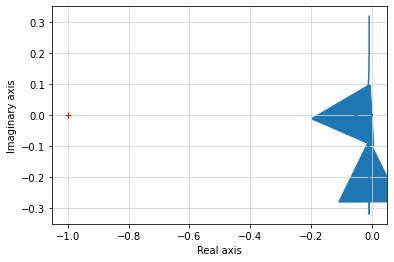

In [218]:
_ = ct.nyquist(g)

Sinceramente, la gráfica de Nyquist no es la mejor, hay que trabajar en una mejor implementación, lo trabajaré en el futuro, son tiempos sin tiempo. 

Si bien la gráfica no es muestra el comportamiento del sistema, por suerte, podemos inferir que sea cual sea la curva presente, esta no envuelve al punto -1+0j, por ende, directamente podemos decir que $n=0$.

Por otro lado, el sistema no cuenta con ningún polo inestable, es decir $p=0$.

Finalmente, ya que $z=p+n=0+0=0$, podemos decir que el sistema es estable bajo el criterio de Nyquist.

---

### d) Para el siguiente sistema en lazo abierto
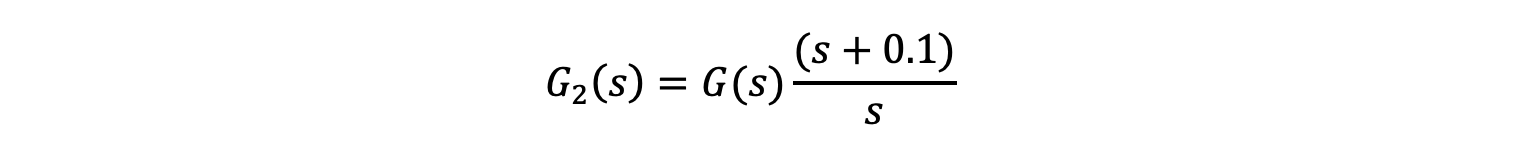
### Muestre la carta de Nichols y a partir de la gráfica encuentre la ganancia proporcional de modo a obtener un margen de fase de 60º.

In [219]:
g2 = g*(s+0.1)/s
g2


              8.602e+07 s^2 + 1.291e+10 s + 1.29e+09
-----------------------------------------------------------------
s^6 + 4.04e+04 s^5 + 4.082e+08 s^4 + 1.452e+09 s^3 + 4.08e+10 s^2

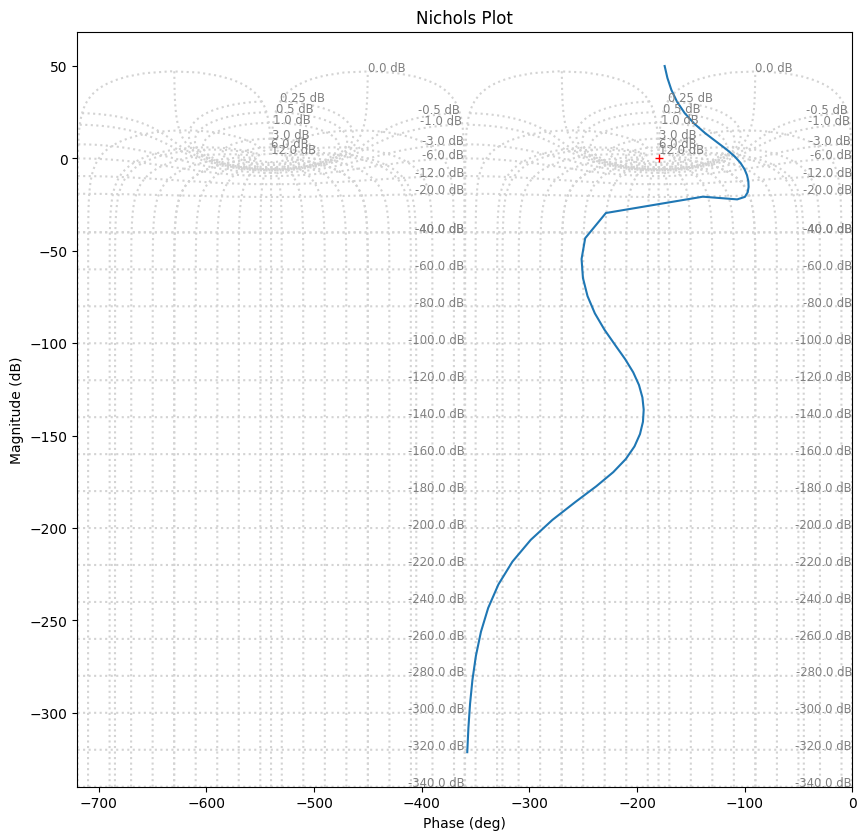

In [220]:
plt.figure(num=None, figsize=(10, 10), dpi=100)
ct.nichols(g2)

Sinceramente, se me vuelve un poco complicado evidenciar el comportamiento del sistema en la carta de Nichols. Pero puedo hacer el intento, el punto rojo muestra el punto de inestabilidad (-1+0j: -180deg, 0dB), por lo tanto, el margen de fase debe de ser las distancia axiales en x de la curva al punto (-1+0j).

Con esa información, calculo que el margen de fase es de aproximadamente 80deg.

Para llevar el margen de fase a 60deg se tiene que hacer que la curva se desplaze hacia abajo, hasta que la curva "toque" -120deg es decir usar una ganancia entre 0 y 1.

Como vemos en el plot, la ganancia para el conseguir el margen esperado está entre -3dB y -6dB, asumiré -4dB, entonces podemos calcular la ganancia como $10^{-4/20}$.


In [740]:
K = 10**(-4/20)
print (f"K ={K}")

K =0.6309573444801932


---

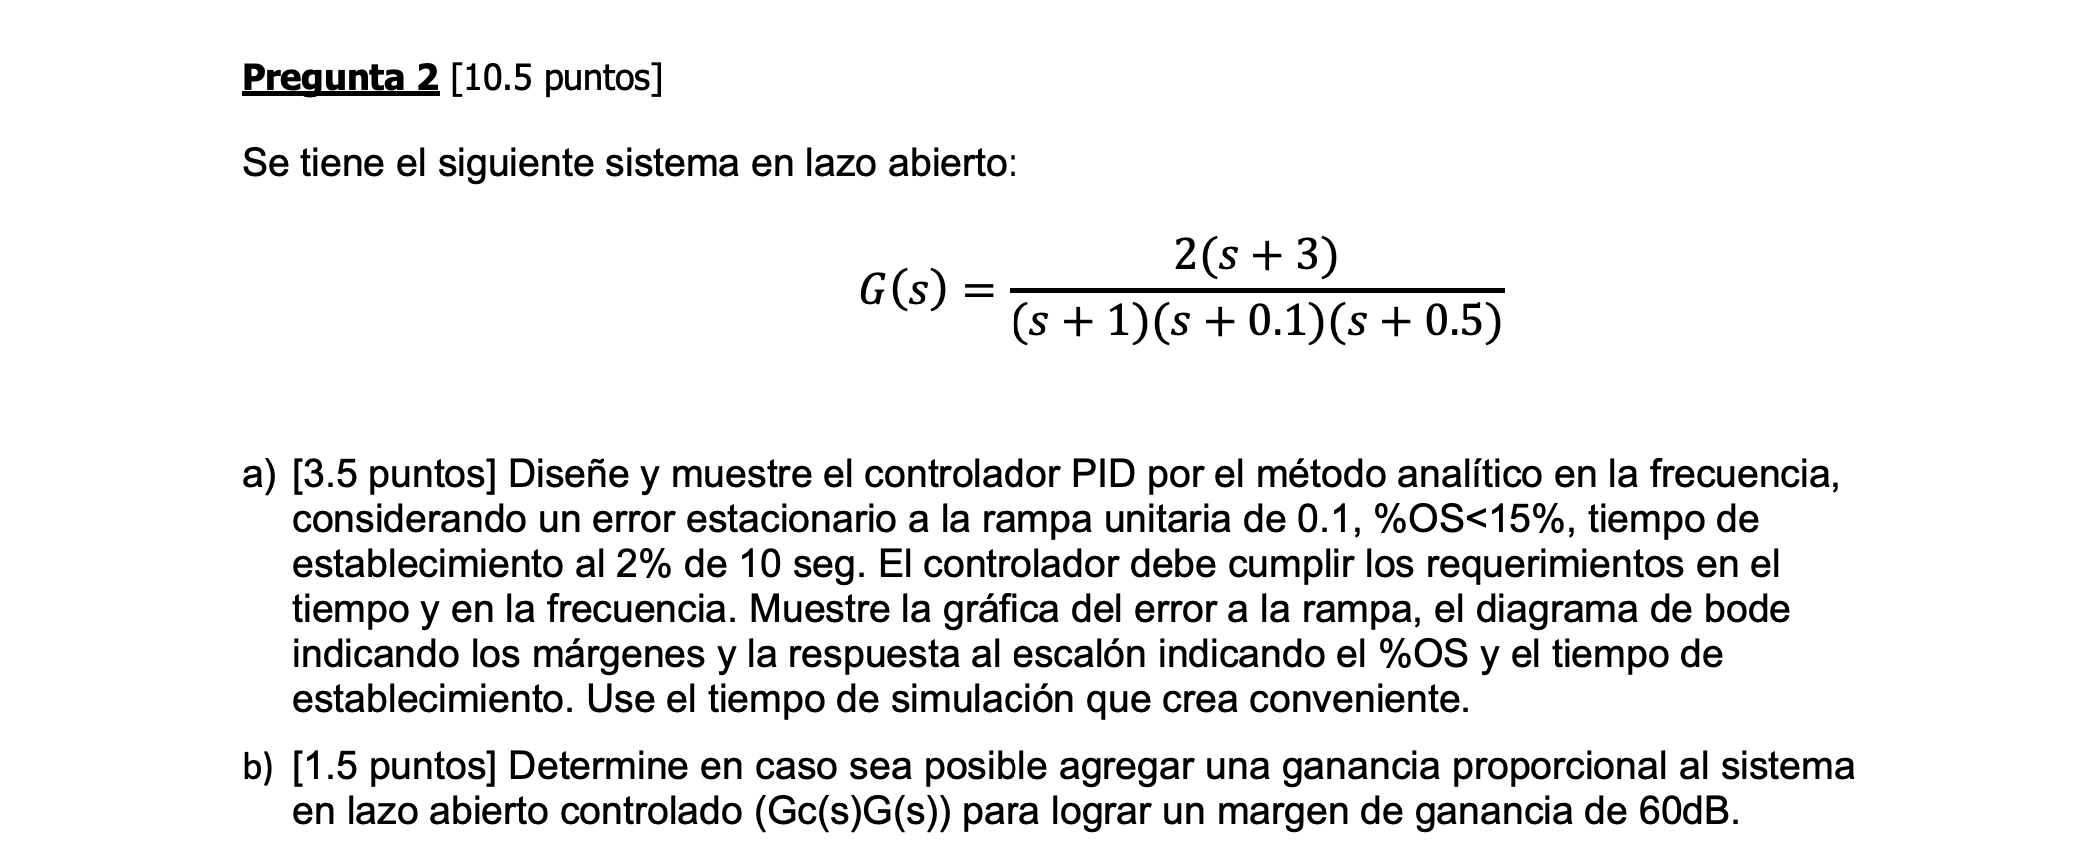

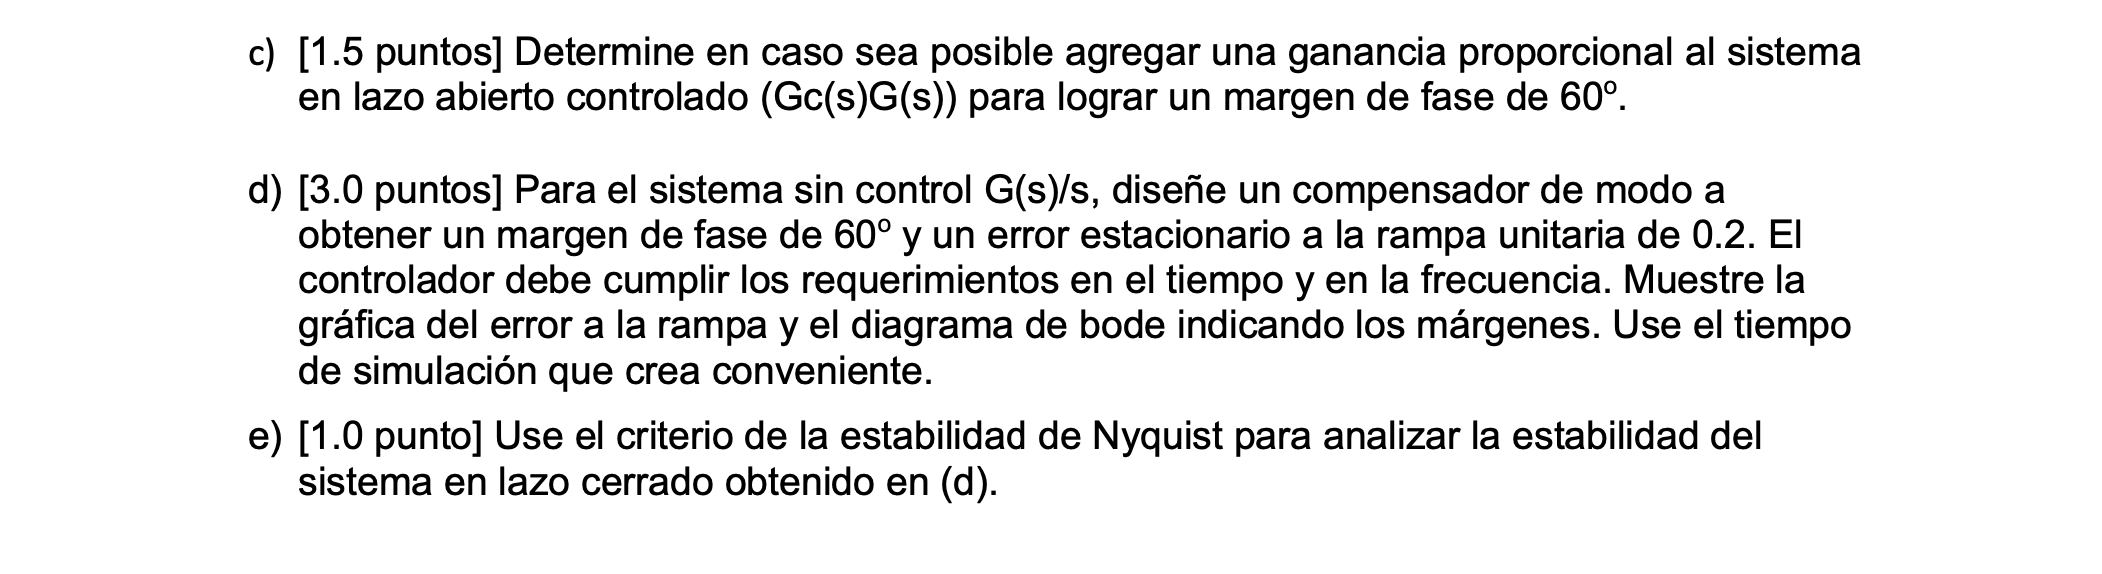

In [224]:
gs = 2*(s+3)/(s+1)/(s+0.1)/(s+0.5)

In [225]:
gs


           2 s + 6
-----------------------------
s^3 + 1.6 s^2 + 0.65 s + 0.05

### a) Diseñe y muestre el controlador PID por el método analítico en la frecuencia, considerando un error estacionario a la rampa unitaria de 0.1, %OS<15%, tiempo de establecimiento al 2% de 10 seg. El controlador debe cumplir los requerimientos en el tiempo y en la frecuencia. Muestre la gráfica del error a la rampa, el diagrama de bode indicando los márgenes y la respuesta al escalón indicando el %OS y el tiempo de establecimiento. Use el tiempo de simulación que crea conveniente.

In [255]:
err_at_ramp = 0.1
po = 8
ts = 8

g_c = gs.horner(0)[0][0]
ki = 1/g_c/err_at_ramp;

print(f"ki = {'%.3f'%ki.real}")

psi = np.log(100/po)/np.sqrt(np.pi**2+(np.log(100/po))**2)
wn = 4/psi/ts
m_phase = 100*psi
wc_phase = wn

print(f"psi = {'%.3f'%psi.real} | wn = {'%.3f'%wn.real}")

g_c = g.horner(wc_phase)
g_mag = np.abs(g_c)
g_angle = np.angle(g_c)
k_mag = 1/g_mag

print(f"k_mag = {'%.3f'%k_mag.real}")

theta_k = -np.pi + m_phase*np.pi/180 - g_angle

print(f"theta_k = {'%.3f'%theta_k.real}")

kp = k_mag*np.cos(theta_k)
kp = kp[0][0]
kd = (k_mag*np.sin(theta_k) + ki/wc_phase)/wc_phase
kd = kd[0][0]

kp = np.abs(kp)
ki = np.abs(ki)
kd = np.abs(kd)

print("")

print("kp=%.3f | ki=%.3f | kd=%.3f"%(kp, ki, kd))

ki = 0.083
psi = 0.627 | wn = 0.798
k_mag = 2.597
theta_k = -2.048

kp=1.193 | ki=0.083 | kd=2.760


In [232]:
m_phase

74.48035391268718

In [256]:
pid = kp + kd*s + ki/s
display(pid)


2.76 s^2 + 1.193 s + 0.08333
----------------------------
              s

{'RiseTime': 0.2401972692192599,
 'SettlingTime': 1.2009863460962995,
 'SettlingMin': 0.963639211483651,
 'SettlingMax': 1.0952457045418549,
 'Overshoot': 9.524684773044838,
 'Undershoot': 0.0,
 'Peak': 1.0952457045418549,
 'PeakTime': 0.6405260512513598,
 'SteadyStateValue': 0.9999989562274515}

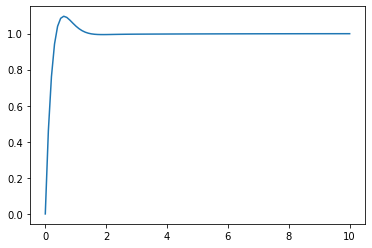

In [257]:
sys = ct.feedback(pid*gs, 1)
t = np.linspace(0, 10, 100)
t, y = ct.step_response(sys, t)
plt.plot(t, y)
ct.step_info(sys)

Como se puede apreciar, conseguimos los requerimientos temporales.
$$ Ts = 1.2s < 10s$$
$$ PO = 9.5\%  < 15\%$$

(inf, 141.05618048122767, nan, 4.343834926109888)

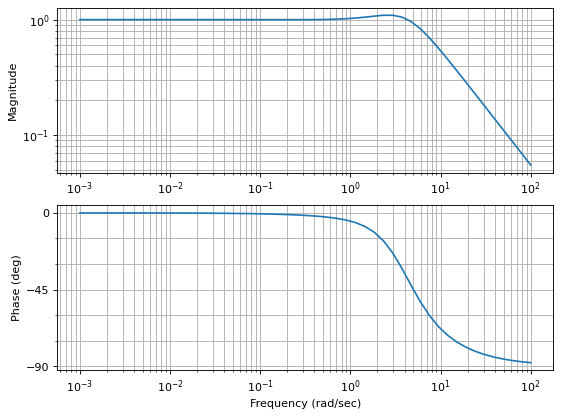

In [258]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
_ = ct.bode(sys)
ct.margin(sys)

El margen de fase es de $141\deg$ y el margen de ganancia $\inf$

In [1]:
t = np.linspace(0, 50, 100)
u = t
_, y, _ = ct.forced_response(sys, u, t)
err = u - y
plt.plot(t, err)

NameError: name 'np' is not defined

Finalmente, la gráfica del *error a la rampa* muestra como el error se estabiliza en $0.1$, cumpliendo así el último requerimiento.

---

### b) Determine en caso sea posible agregar una ganancia proporcional al sistema en lazo abierto controlado (Gc(s)G(s)) para lograr un margen de ganancia de 60dB.

In [282]:
sys2 = pid*gs
display(sys2)


5.521 s^3 + 18.95 s^2 + 7.325 s + 0.5
-------------------------------------
  s^4 + 1.6 s^3 + 0.65 s^2 + 0.05 s

(inf, 74.62407495815904, nan, 6.066038405455967)

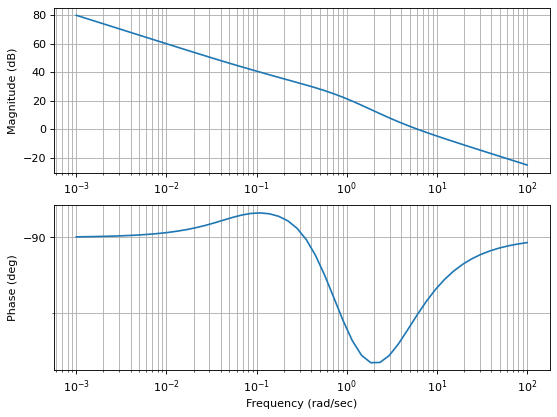

In [285]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
_ = ct.bode(sys2, dB=True)
ct.margin(sys2)

Usando solo una ganancia proporcional es imposible manipular la fase y por lo tanto tampoco el margen de ganancia. Una ganancia proporcional desplaza verticalmente a la magnitud.

---

### c) Determine en caso sea posible agregar una ganancia proporcional al sistema en lazo abierto controlado (Gc(s)G(s)) para lograr un margen de fase de 60º.

k=0.1 | gm=69.78
k=0.2 | gm=65.05
k=0.25 | gm=64.88
k=0.3 | gm=65.20
k=0.5 | gm=68.00
k=1.0 | gm=74.62


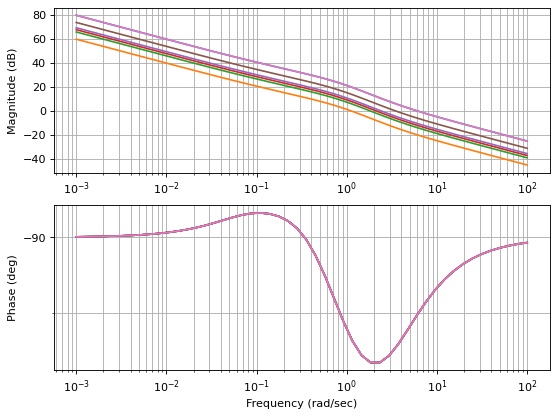

In [313]:
plt.figure(num=None, figsize=(8, 6), dpi=80)

_ = ct.bode(sys2, dB=True)

for k in [0.10, 0.20, 0.25, 0.30, 0.50, 1.00]:
    sys3 = k*sys2
    _ = ct.bode(sys3, dB=True)
    print(f"k={k} | gm={'%.2f'%ct.margin(sys3)[1]}")

In [332]:
min(ct.bode(sys2, Plot=False)[1])*180/np.pi

-114.97755994673986

Nos piden llegar a un margen de fase de 60deg, para este caso en concreto, eso es imposible por la forma de la respuesta en fase del sistema. Esto se debe a que el menor valor de la fase es cercano de alrededor de -115deg, por lo tanto, el menor margen de fase posible será de $180 - 115 = 65$. Y esto es evidente en la gráfica de arriba, donde se ve que no hay forma de ir más abajo que 65deg.

---

### d) Para el sistema sin control G(s)/s, diseñe un compensador de modo a obtener un margen de fase de 60o y un error estacionario a la rampa unitaria de 0.2. El controlador debe cumplir los requerimientos en el tiempo y en la frecuencia. Muestre la gráfica del error a la rampa y el diagrama de bode indicando los márgenes. Use el tiempo de simulación que crea conveniente.

In [336]:
sys4 = gs/s
display(sys4)


             2 s + 6
---------------------------------
s^4 + 1.6 s^3 + 0.65 s^2 + 0.05 s

gm=0.0037@0.19 | pm=-97.8015@1.52


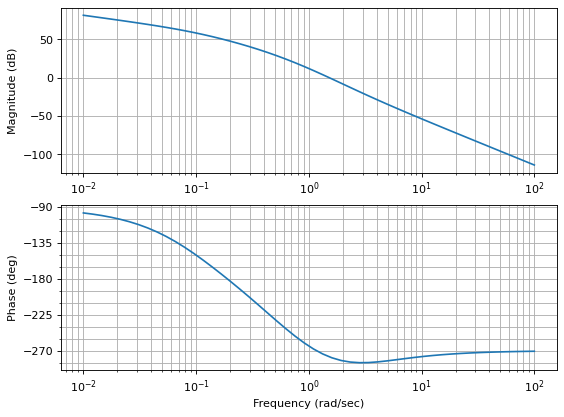

In [344]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
_ = ct.bode(sys4, dB=True)
gm, pm, gmw, pmw = ct.margin(sys4)
print(f"gm={'%.4f'%gm}@{'%.2f'%gmw} | pm={'%.4f'%pm}@{'%.2f'%pmw}")

Se pide un compensador que genere un margen de fase en 60deg y un error estacionario a la rampa de 0.2.

Usaré un lead compensator para llevar el margen de fase de -97.8deg a 60deg. Y para asegurar un error en estado estable a la rampa de 0.2 solo evaluaré el límite cuando s tiende a 0.

$$ \frac{1}{err} = K_v =  \lim_{s\rightarrow 0} sG(s)K_c$$

$$5 =  \lim_{s\rightarrow 0} \frac{K_c(2s+6)}{s^3+1.6s^2+0.65s+0.05}$$

$$5 = \frac{K_c6}{0.05}$$

$$ K_c = \frac{5\cdot0.05}{6} = 0.0416$$

La forma del lead compensator que diseñaré es la siguiente:
$$ K(s) = \frac{a\tau s + 1}{\tau s + 1} $$

In [604]:
k_c = 0.0416

pm_d = 60

pm = -97.8
pm_w = 1.61

pm_calc = 157

phi = np.sin(pm_calc*np.pi/180)
a = (1+phi)/(1-phi)
tau = 1/pm_w/np.sqrt(a)

print(p, f"a={'%.3f'%a} | tau={'%.3f'%tau}")

lead = (a*tau*s + 1)/(tau*s + 1)
compensator = k_c*lead
display(compensator)

157.8 a=2.283 | tau=0.411



0.03904 s + 0.0416
------------------
   0.4111 s + 1

gm=0.1116@0.21 | pm=-42.3486@0.56


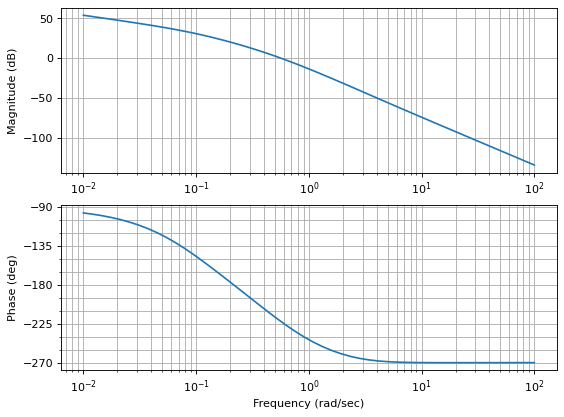

In [605]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
_ = ct.bode(compensator*sys4, dB=True)
# _ = ct.bode(k_c*lead, dB=True)
gm, pm, gmw, pmw = ct.margin(k_c*lead*sys4)
print(f"gm={'%.4f'%gm}@{'%.2f'%gmw} | pm={'%.4f'%pm}@{'%.2f'%pmw}")

Despues de intentar mucho, no he conseguido que el lead lleve el margen de ganancia de -97 a 60. He llegado a la con de que esto es debido al máximo de amplitud que puede tener la fase, esta no puede ser mayor de 90deg, es decir, lo máximo que podría conseguir con un lead compensator en este sistema es un margen de fase de 7deg y no hay forma de llegar a los 157 necesarios para cumplir el requerimiento.

Por eso, ahora diseñaré un lag compensator asegurando un nuevo cruce de ganancia.

In [596]:
# Partamos del principo
_ = ct.bode(sys4, dB=True, Plot=False)
gm, pm, gmw, pmw = ct.margin(sys4)
print(f"gm={'%.4f'%gm}@{'%.2f'%gmw} | pm={'%.4f'%pm}@{'%.2f'%pmw}")

gm=0.0037@0.19 | pm=-97.8015@1.52


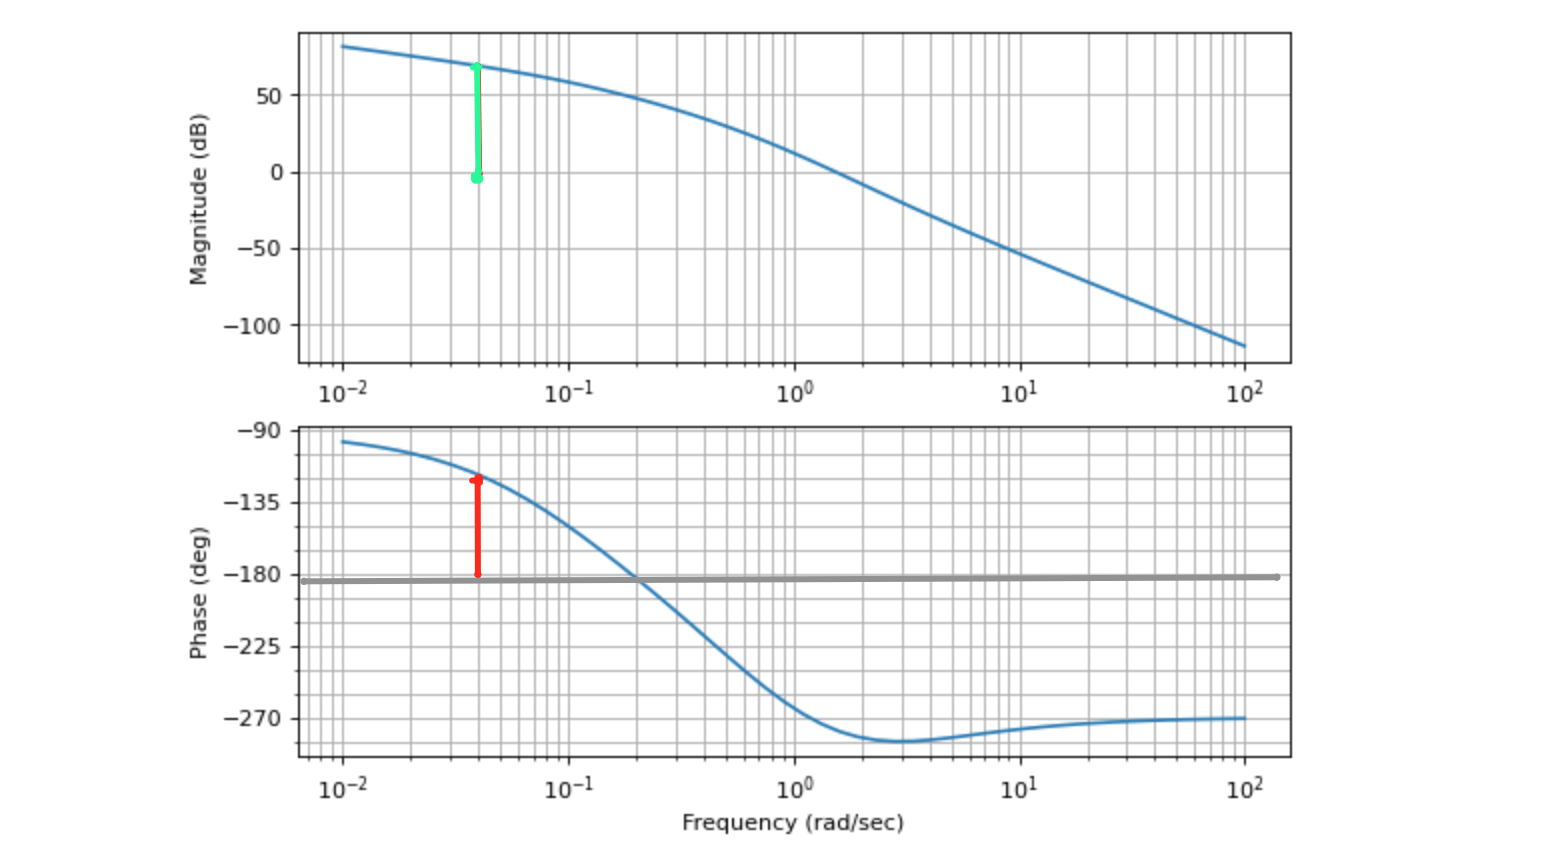

En la imagen de arriba, están marcados los puntos de interes, queremos llevar al margen de ganancia al donde muestran las barran verde y roja, con la finalidad de conseguir un margen de fase de 60deg.

Podemos apreciar que la longitud de la diferencia de magnitud (barra verde)es de aproximadamente 60dB, sabiendo que 20dB equivalen a un factor de 10, 60db equivalen a un factor de 30.

In [728]:
err_ramp = 0.2
fr_at_0 = ct.evalfr(ct.minreal(s*sys4), 0).real

kc = 1/err_ramp/fr_at_0;

pm = 60
pm_w = 10**-1.4

g_pm = ct.evalfr(sys4, 1j*pm_w)

g_abs = abs(g_pm)
theta = np.angle(g_pm)
k_abs = 1/g_abs
d_theta = -np.pi+ pm*np.pi/180 - theta
b = k_abs*(kc*np.cos(d_theta)-k_abs)/(kc*(kc-k_abs*np.cos(d_theta)))
tau = (k_abs*np.cos(d_theta)-kc)/(k_abs*pm_w*np.sin(d_theta))

compensator = kc*(b*tau*s+1)/(tau*s+1)

1 states have been removed from the model


In [729]:
compensator


26.76 s + 0.04167
-----------------
 7.472e+04 s + 1

gm=10.0532@0.19 | pm=60.0000@0.04


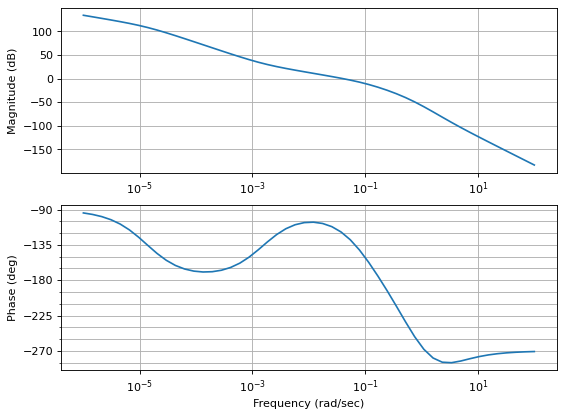

In [730]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
_ = ct.bode(compensator*sys4, dB=True)
# _ = ct.bode(k_c*lead, dB=True)
gm, pm, gmw, pmw = ct.margin(compensator*sys4)
print(f"gm={'%.4f'%gm}@{'%.2f'%gmw} | pm={'%.4f'%pm}@{'%.2f'%pmw}")

Como se puede apreciar, el compesador diseñado satisface el requerimiento de un margen de ganancia de 60deg

$$ gm=10.0532 \ pm=60.00$$

0.2075506234450586


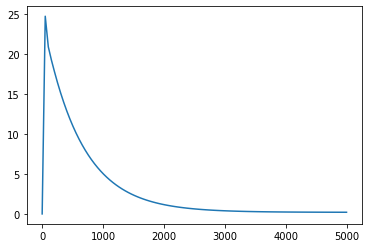

In [731]:
final_sys = ct.feedback(compensator*sys4, 1)
t = np.linspace(0, 5000, 100)
u = t
_, y, _ = ct.forced_response(final_sys, u, t)
err = u - y
plt.plot(t, err)
print(err[-1])

Finalmente, como se puede apreciar en la gráfica de arriba, el error a la rampa se estabiliza en 0.2, pero eso sí, es bastante lento, tardandose casi 5000 segundos en llegar a 0.207...

---

### Use el criterio de la estabilidad de Nyquist para analizar la estabilidad del sistema en lazo cerrado obtenido en (d).

In [736]:
final_sys.pole()

array([-0.99677328+0.j        , -0.51702985+0.j        ,
       -0.04229717+0.04720995j, -0.04229717-0.04720995j,
       -0.00161591+0.j        ])

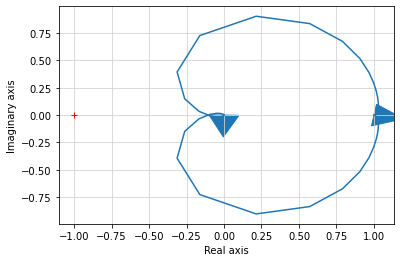

In [735]:
_ = ct.nyquist(final_sys)

Bueno, solo queda decir que bajo el criterio de nyquist, el sistema es estable ya que $z = p - n$ y como $ p = 0 $ y $n = 0$ entonces $ z = 0$.